# Individual HW2: Predict Customer Churn

![Image of Customer Churn](https://www.livechatinc.com/wp-content/uploads/2016/04/customer-churn@2x.jpg)

In [157]:
# -*- coding:utf-8 -*-
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
from math import sqrt, log
from __future__ import division
from collections import defaultdict
%matplotlib inline

py.offline.init_notebook_mode(connected=True)

# Problem Definition + Loading of Data

The telecommunication company has been meaning to find out what is the cause of customer churn. Using the dataset provided, I would have to find out which are the contributing factors so that the company can various actions to reduce the amount of customer churn and improve their telecommunication service.


In [158]:
#Load dataset
filepath = "./WA_Fn-UseC_-Telco-Customer-Churn.csv"
data = pd.read_csv(filepath)
data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [159]:
# Print the unique values of each attribute to observe datatype
features = data.columns.values
for feature in features: 
    print(feature , ": " , data[feature].unique())

customerID :  ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender :  ['Female' 'Male']
SeniorCitizen :  [0 1]
Partner :  ['Yes' 'No']
Dependents :  ['No' 'Yes']
tenure :  [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService :  ['No' 'Yes']
MultipleLines :  ['No phone service' 'No' 'Yes']
InternetService :  ['DSL' 'Fiber optic' 'No']
OnlineSecurity :  ['No' 'Yes' 'No internet service']
OnlineBackup :  ['Yes' 'No' 'No internet service']
DeviceProtection :  ['No' 'Yes' 'No internet service']
TechSupport :  ['No' 'Yes' 'No internet service']
StreamingTV :  ['No' 'Yes' 'No internet service']
StreamingMovies :  ['No' 'Yes' 'No internet service']
Contract :  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling :  ['Yes' 'No']
PaymentMethod :  ['Electronic check' 'Mail

### Attributes and their datatypes: 

1. Customer ID: Categorical
2. Gender: Binary 
3. Senior Citizen: Binary
4. Partner: Binary
5. Dependents: Binary
6. tenure: Continuous/Ordinal 
7. Phone Service: Binary 
8. Multiple Lines: Categorical 
9. Internet Service: Categorical 
10. Online Security : Categorical
11. Online Backup:Categorical
12. Device Protection: Categorical
13. Tech Support: Categorical
14. Streaming TV: Categorical
15. Streaming Movies: Categorical
16. Contract: Categorical
17. Paperless Billing: Binary
18. Payment Method: Categorical
19. Monthly Charges: Ordinal
20. Total Charges: Ordinal

# Exploratory Data Analysis


I will first perform Exploratory Data Analysis. EDA will comprise of the following: 

1. Data Cleaning (Dealing with Missing Data)
2. Plotting Pie Charts for Categorical Data 
3. Plotting Box Plot to check for Outliers in Continuous Data
4. Plotting Histograms for Continuous Data
5. Plotting Pair Plot for Continuous Data


## 1. Dealing with Missing Data

In [160]:
empty = data[data["TotalCharges"] == " "]
empty

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


__Observation__: There are a total of 11 data points with missing total charges. One plausible reason is they just signed with the company since their tenure are all "0". Thus, these datapoints are not useful to us since they will show little information on whether one will churn. Therefore, it will be appropriate to remove these datapoints. 


In [161]:
# Delete the 11 data points
data = data[data['TotalCharges'] != " "]

#changing the data type to numeric
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])

### General outlook of the Data

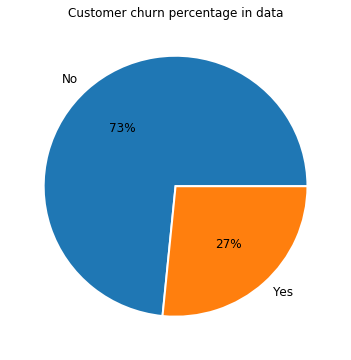

In [162]:
plt.figure(figsize=(13,6))
plt.subplot(121)
data["Churn"].value_counts().plot.pie(autopct  = "%1.0f%%",
                                        fontsize = 12,
                                        wedgeprops = {"linewidth" : 2,
                                                      "edgecolor" : "w"},
                                       )
plt.title("Customer churn percentage in data")
plt.ylabel("")
plt.show()

## 2. Plotting Pie Charts for Categorical Data

In [163]:
#Separating dataset into churn and non-churn customers.
churn     = data[data["Churn"] == "Yes"]
not_churn = data[data["Churn"] == "No"]

#Separating catagorical and numerical columns
Id_col     = ['customerID']
target_col = ["Churn"]
cat_cols   = data.nunique()[data.nunique() < 6].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
num_cols   = [x for x in data.columns if x not in cat_cols + target_col + Id_col]

In [164]:
def plot_pie(column) :
    
    #plots the churn customer pie chart
    trace1 = go.Pie(values  = churn[column].value_counts().values.tolist(),
                    labels  = churn[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    domain  = dict(x = [0,.48]),
                    name    = "Churn Customers",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    hole    = .6
                   )
    
    #plots the not churn customer pie chart
    trace2 = go.Pie(values  = not_churn[column].value_counts().values.tolist(),
                    labels  = not_churn[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    domain  = dict(x = [.52,1]),
                    hole    = .6,
                    name    = "Non churn customers" 
                   )


    layout = go.Layout(dict(title = column,
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            annotations = [dict(text = "churn customers",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .15, y = .5),
                                           dict(text = "Non churn customers",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .88,y = .5
                                               )
                                          ]
                           )
                      )
    data = [trace1,trace2]
    fig  = go.Figure(data = data,layout = layout)
    py.iplot(fig)
    


#for all categorical columns plot pie
for i in cat_cols :
    plot_pie(i)

__Observation__: 

1. Gender: Not likely to affect churn decision
2. Senior Citizen: People who are senior citizen are slightly more likely to churn. 
3. Parnter/Dependents: People who had a parnter or is an dependent are slightly less likely to churn.
4. Phone Servce: Not likely to affect churn decision
5. Multiple Lines: Not likely to affect churn decision
6. Internet Service: People who had no internet service are less likely to churn
7. Online Security: People who had online security are less likely to churn. 
8. Online Backup: People who had online backup are slightly likely to churn. 
9. Device Protection: Not likely to affect churn decision 
10. Tech Support: People who had tech support are less likely to churn 
11. Streaming TV/Movie: People who had streaming tv service are slightly more likely to churn. 
12. Contract: People who churn tend to have __monthly__ contract. 
13. Paperless Billing: People who churn tend to not have paperless billing. 
14. Payment Method: People who churn tend to have electronic check. 

One interesting thing that I noticed is how most non-churn customers did not have internet service. At the same time, people who churned tend to not have additional service such as online backup or online secruity, which makes me question if the service on the internet side for this telecommunication company is weaker as compared to their phone service. (or maybe the price is not as favourable for them.)

## 3) Plotting Box Plot to Check for Outliers

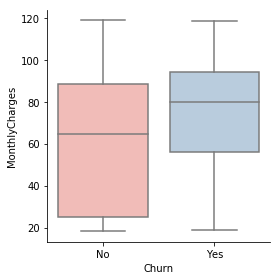

In [165]:
g = sns.factorplot(x="Churn", y = "MonthlyCharges",data = data, kind="box", palette = "Pastel1")

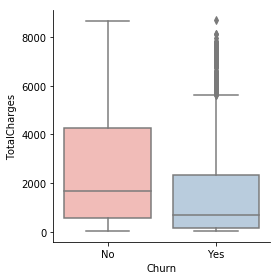

In [166]:
g = sns.factorplot(x = "Churn", y = "TotalCharges", data = data, kind = "box", palette = "Pastel1")

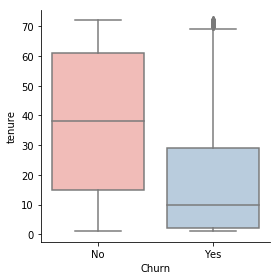

In [167]:
g = sns.factorplot(x = "Churn", y = "tenure", data = data, kind = "box", palette = "Pastel1")

__Observations__: 

There seems to be no outliers for all the continuous data. There is some relation among these 3 variables: __Total Charges = Monthly Charges * Tenure.__ 

It seems that people who had low tenure and high monthly charges are more likely to churn. This is reflected in total charges where people who had lower total charges. It's counter intuitive, but this means people who had high monthly charges did not stay long enough, thus they churn and cut off the contract with the teleco company in the earlier stages. Therefore, looking at the montly charges will be a better indication of how the customer's bill is like. __There is a high chance whereby I would want to delete the feature Total Charges since I can get Total Charges from the formula above.__

However, it is still important to note that there are a number of people who had high total charges churning, which leads me to conclude in general that high charges cause people to churn. 

## 4) Plotting Histogram for Continuous Data

In [168]:
#function  for histogram for customer attrition types
def histogram(column) :
    trace1 = go.Histogram(x  = churn[column],
                          histnorm= "percent",
                          name = "Churn Customers",
                          marker = dict(line = dict(width = .5,
                                                    color = "black"
                                                    )
                                        ),
                         opacity = .9 
                         ) 
    
    trace2 = go.Histogram(x  = not_churn[column],
                          histnorm = "percent",
                          name = "Non churn customers",
                          marker = dict(line = dict(width = .5,
                                              color = "black"
                                             )
                                 ),
                          opacity = .9
                         )
    
    data = [trace1,trace2]
    layout = go.Layout(dict(title =column + " distribution in customer attrition ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = column,
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                            yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = "percent",
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                           )
                      )
    fig  = go.Figure(data=data,layout=layout)
    
    py.iplot(fig)
    
for i in num_cols :
    histogram(i)

## Plotting Pairplot for Continuous Data

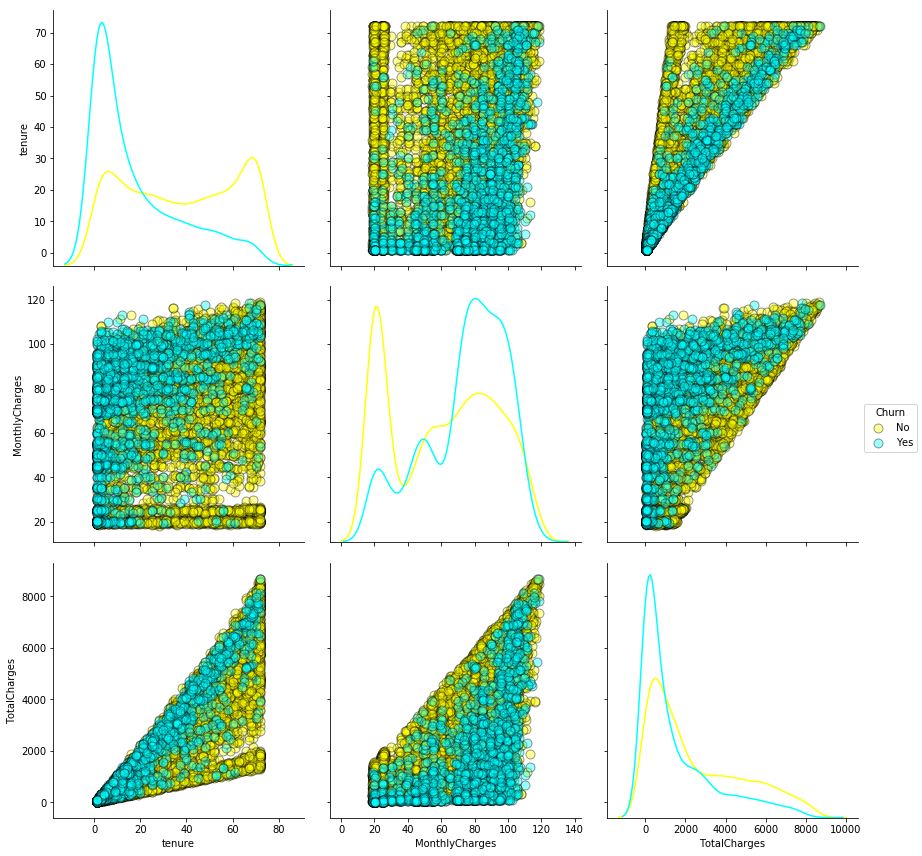

In [169]:
g = sns.pairplot(data[num_cols+["Churn"]], 
                vars = ['tenure','MonthlyCharges','TotalCharges'], 
                 hue="Churn", diag_kind = 'kde', 
             plot_kws = {'alpha': 0.4, 's': 80, 'edgecolor': 'k'},
                 palette = ['yellow','cyan'],
             size = 4);

__Observations__: 

There seems to be high correlation between Total Charges and Tenure. This is obviously the case because total charges are affected by tenure. The longer the tenure, the higher the total charges. 

# Data Pre-Processing

Before running any models, it is important for us to clean and prepare the data for model creation. In this section, I will be doing the following basic data cleaning: 

1. Changing the categories for categorical data from string to numerical. 
2. Obeserve Correlation between features and target ("Churn"). 


## 1) Changing the categories from string to numerical

In [170]:
#factorize changes the categories from string to numerical 
cat_data = data.copy()

for feature in cat_cols+target_col:
    cat_data[feature] = pd.factorize(cat_data[feature])[0]
    
cat_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,29.85,29.85,0
1,5575-GNVDE,1,0,1,0,34,1,1,0,1,...,1,0,0,0,1,1,1,56.95,1889.50,0
2,3668-QPYBK,1,0,1,0,2,1,1,0,1,...,0,0,0,0,0,0,1,53.85,108.15,1
3,7795-CFOCW,1,0,1,0,45,0,0,0,1,...,1,1,0,0,1,1,2,42.30,1840.75,0
4,9237-HQITU,0,0,1,0,2,1,1,1,0,...,0,0,0,0,0,0,0,70.70,151.65,1


## 2) Observe Correlation

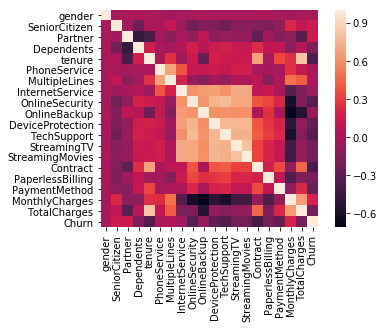

In [171]:
cor = cat_data.corr() #Calculate the correlation of the above variables
sns.heatmap(cor, square = True) #Plot the correlation as heat map

__Observations__: 

1. There seems to be high correlation between Monthly Charges and the Internet Service (Online Backup etc) provided. 
2. Thereis a really high correlation between Tenure and Total Charges, as explained before. This will provide as evidence to remove "Toatl Charges" from my dataset.


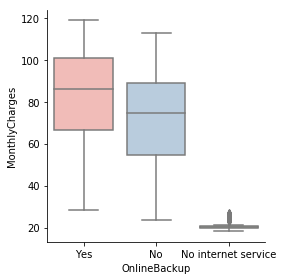

In [172]:
g = sns.factorplot(x="OnlineBackup", y = "MonthlyCharges",data = data, kind="box", palette = "Pastel1")

People who has additional internet service like OnlineBackup tend to have higher monthly charges, which is reasonable. However, there is a huge gap in charges for people who have internet service and people who dont. It seems that getting Internet Service from this teleco company tend to be expensive. 

As explained before, a lot of people who churned are those without additional internet services. One reason why they might not want to sign for additional services is due to the high prices. Since they are already paying for high prices for the Internet Service, they are not able to pay for additional services. (Additional Data: Finance Class)However, without such additional service and protection, it seems like the customers are getting poor quality products and they rather find other companies that may give them higher quality service for a more friendly price. 


In [173]:
corr_churn = cat_data.corr()["Churn"].sort_values()
corr_churn

Contract           -0.396150
tenure             -0.354049
OnlineSecurity     -0.332443
TechSupport        -0.329474
DeviceProtection   -0.281048
PaymentMethod      -0.262918
StreamingMovies    -0.207150
StreamingTV        -0.205246
TotalCharges       -0.199484
PaperlessBilling   -0.191454
Dependents         -0.163128
OnlineBackup       -0.073934
InternetService    -0.047097
gender             -0.008545
PhoneService        0.011691
MultipleLines       0.036148
Partner             0.149982
SeniorCitizen       0.150541
MonthlyCharges      0.192858
Churn               1.000000
Name: Churn, dtype: float64

__Observations__: 

__Contract, tenure and several services__ provided by the company have higher correlation with the decision to churn. We should keep an eye out for this features during as we create our models. 

# Feature Engineering

Feature engineering is the process of using domain knowledge of the data to create features that make machine learning algorithms work. If feature engineering is done correctly, it increases the predictive power of machine learning algorithms by creating features from raw data that help facilitate the machine learning process.

I will be doing the following: 

1. Making Features Binary ([1,0]) 
2. Using pd.get_dummies for certain features
3. New feature: Has_InternetService 
4. New feature: no_ofservice
5. New feature: Change in Contract

## 1) Making Features Binary 

In [174]:
#drop total charges
totalcharges = data["TotalCharges"]
data.drop(['TotalCharges'], axis=1, inplace=True)

#changing Binary Data with Strings to [1,0]
data["Male"] = data["gender"].map(lambda x: 1 if x == "Male" else 0)
data["Female"] = data["gender"].map(lambda x: 1 if x == "Female" else 0)
data.drop(['gender'], axis=1, inplace=True)

data["Partner"] = data["Partner"].map(lambda x: 1 if x == "Yes" else 0)
data["Dependents"] = data["Dependents"].map(lambda x: 1 if x == "Yes" else 0)
data["PhoneService"] = data["PhoneService"].map(lambda x: 1 if x == "Yes" else 0)
data["PaperlessBilling"] = data["PaperlessBilling"].map(lambda x: 1 if x == "Yes" else 0)
data["Churn"] = data["Churn"].map(lambda x: 1 if x == "Yes" else 0)

data["MultipleLines"] = data["MultipleLines"].map(lambda x: 1 if x == "Yes" else 0)

data.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn,Male,Female
0,7590-VHVEG,0,1,0,1,0,0,DSL,No,Yes,...,No,No,No,Month-to-month,1,Electronic check,29.85,0,0,1
1,5575-GNVDE,0,0,0,34,1,0,DSL,Yes,No,...,No,No,No,One year,0,Mailed check,56.95,0,1,0
2,3668-QPYBK,0,0,0,2,1,0,DSL,Yes,Yes,...,No,No,No,Month-to-month,1,Mailed check,53.85,1,1,0
3,7795-CFOCW,0,0,0,45,0,0,DSL,Yes,No,...,Yes,No,No,One year,0,Bank transfer (automatic),42.30,0,1,0
4,9237-HQITU,0,0,0,2,1,0,Fiber optic,No,No,...,No,No,No,Month-to-month,1,Electronic check,70.70,1,0,1


## 2) Using pd.get_dummies

In [175]:
data = pd.get_dummies(data=data, columns=['PaymentMethod'])
data = pd.get_dummies(data=data, columns=['Contract'])
data.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,Churn,Male,Female,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year
0,7590-VHVEG,0,1,0,1,0,0,DSL,No,Yes,...,0,0,1,0,0,1,0,1,0,0
1,5575-GNVDE,0,0,0,34,1,0,DSL,Yes,No,...,0,1,0,0,0,0,1,0,1,0
2,3668-QPYBK,0,0,0,2,1,0,DSL,Yes,Yes,...,1,1,0,0,0,0,1,1,0,0
3,7795-CFOCW,0,0,0,45,0,0,DSL,Yes,No,...,0,1,0,1,0,0,0,0,1,0
4,9237-HQITU,0,0,0,2,1,0,Fiber optic,No,No,...,1,0,1,0,0,1,0,1,0,0


## 3) New Feature: Has_InternetService

For Internet Service, there are 3 unique categories: DSL, Fiber Optic, No. We can do something similar for the feature like the Phone Service feature whereby we create a new column called Has_InternetService. Then, we can treat the rest of the Internet Service to binary. 

In [176]:
data["Has_InternetService"] = data["InternetService"].map(lambda x: 0 if x == "No" else 1)
data["DSL"] = data["InternetService"].map(lambda x: 1 if x == "DSL" else 0) 
data["FiberOptic"] = data["InternetService"].map(lambda x: 1 if x == "Fiber optic" else 0)
data.drop(['InternetService'], axis=1, inplace=True)

data['OnlineSecurity'] = data['OnlineSecurity'].map(lambda x :1  if x =='Yes' else 0)
data['OnlineBackup'] = data['OnlineBackup'].map(lambda x :1  if x =='Yes' else 0)
data['DeviceProtection'] = data['DeviceProtection'].map(lambda x :1  if x =='Yes' else 0)
data['TechSupport'] = data['TechSupport'].map(lambda x :1  if x =='Yes' else 0)
data['StreamingTV'] = data['StreamingTV'].map(lambda x :1  if x =='Yes' else 0)
data['StreamingMovies'] = data['StreamingMovies'].map(lambda x :1  if x =='Yes' else 0)

data.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year,Has_InternetService,DSL,FiberOptic
0,7590-VHVEG,0,1,0,1,0,0,0,1,0,...,0,0,1,0,1,0,0,1,1,0
1,5575-GNVDE,0,0,0,34,1,0,1,0,1,...,0,0,0,1,0,1,0,1,1,0
2,3668-QPYBK,0,0,0,2,1,0,1,1,0,...,0,0,0,1,1,0,0,1,1,0
3,7795-CFOCW,0,0,0,45,0,0,1,0,1,...,1,0,0,0,0,1,0,1,1,0
4,9237-HQITU,0,0,0,2,1,0,0,0,0,...,0,0,1,0,1,0,0,1,0,1


In [177]:
data["Churn"].corr(data["Has_InternetService"])

0.22757762044656282

## 4) New Feature: no_ofservice

As mentioned before, it seems like whether one signs up for a particular service (eg: Online Security) affects whether one's decision to churn. Thus, creating a new feature: no_ofservice, stores the number of service that someone is has. 

In [178]:
data["no_ofservice"] = data['PhoneService'] +  data['MultipleLines'] + data['OnlineSecurity'] + data['OnlineBackup'] +data['DeviceProtection'] + data['TechSupport'] + data['StreamingTV'] +data['StreamingMovies'] + data['Has_InternetService']

In [179]:
data["Churn"].corr(data["no_ofservice"])

-0.019643576910665587

## 5) Change in Contract

If we were to calculate Total Charges from getting monthly charges * tenure, would we get the same amount?

In [180]:
data['totalcharges_new'] = data['MonthlyCharges'] *  data['tenure']
d = {"new": data.totalcharges_new, "old" : totalcharges}
compare = pd.DataFrame(data = d)
compare.head()

,new,old
0,29.85,29.85
1,1936.30,1889.50
2,107.70,108.15
3,1903.50,1840.75
4,141.40,151.65


From the above, it seems like the new and old total charges does not match up, which leads me to conclude there might have been a change in contract that is not recorded in this dataset.  

In this case, I choose 100 dollars difference as a bench mark because it will translate to around a $8 increase per month, which is quite significant for one. 

In [181]:
data['Change_Plan'] = abs(data['totalcharges_new'] - totalcharges)
data['Change_Plan'] = data['Change_Plan'].map(lambda s :1  if s > 100 else 0)

Text(0.5,1,'Normal Customer VS Customer who changed monthly plan')

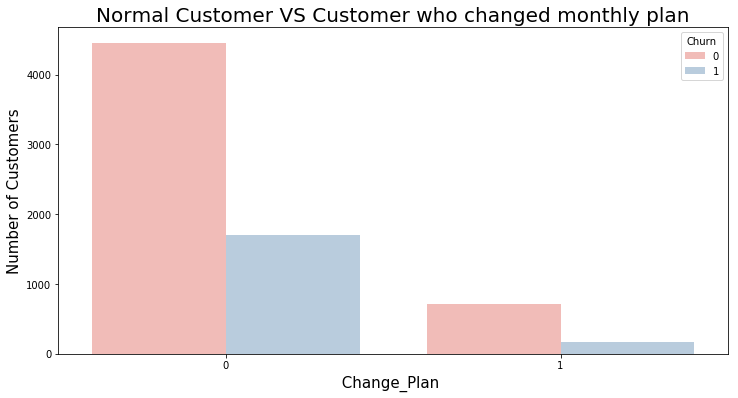

In [182]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x="Change_Plan", hue="Churn", data= data , palette = "Pastel1");
ax.set_ylabel('Number of Customers', fontsize = 15)
ax.set_xlabel(' Change_Plan  ', fontsize = 15)

ax.set_title('Normal Customer VS Customer who changed monthly plan', fontsize=20)

In [183]:
#drop total charges
data.drop(['totalcharges_new'], axis=1, inplace=True)

data.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year,Has_InternetService,DSL,FiberOptic,no_ofservice,Change_Plan
0,7590-VHVEG,0,1,0,1,0,0,0,1,0,...,1,0,1,0,0,1,1,0,2,0
1,5575-GNVDE,0,0,0,34,1,0,1,0,1,...,0,1,0,1,0,1,1,0,4,0
2,3668-QPYBK,0,0,0,2,1,0,1,1,0,...,0,1,1,0,0,1,1,0,4,0
3,7795-CFOCW,0,0,0,45,0,0,1,0,1,...,0,0,0,1,0,1,1,0,4,0
4,9237-HQITU,0,0,0,2,1,0,0,0,0,...,1,0,1,0,0,1,0,1,2,0


# Creating Models 

We are finally ready to create models for our dataset. I will do the following: 

1. Spliting Train and Test data
2. Running Single Models: Logistic 
3. Running Single Models: Decision Tree
4. Running Ensemble Learning: Bagging
5. Running Ensemble Learning: Random Forest
6. Running Ensemble Learning: AdaBoost 
7. Comparison of Models and select the best (Kfold)

For each single models, I will be doing Recursive Feature Elimination(RFE). The Recursive Feature Elimination (RFE) method is a feature selection approach. It works by recursively removing attributes and building a model on those attributes that remain. It uses the model accuracy to identify which attributes (and combination of attributes) contribute the most to predicting the target attribute.

## 1) Spliting Train and Test Data

In [184]:
from sklearn.model_selection import train_test_split

train,test = train_test_split(data,test_size = .3 ,random_state = 111)

#getting categorical variables
cat    = [i for i in data.columns if i not in Id_col + target_col]

x_train = train[cat]
y_train = train[target_col]
x_test = test[cat]
y_test = test[target_col]

### Code to plot confusion matrix

In [185]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


## 2) Running Single Models: Logistic Regression

Confusion matrix, without normalization
[[1384  147]
 [ 271  308]]


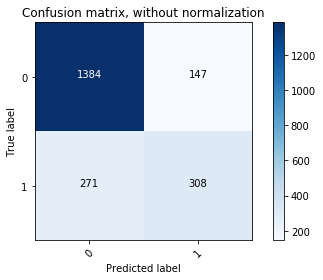

Accuracy:  0.8018957345971564


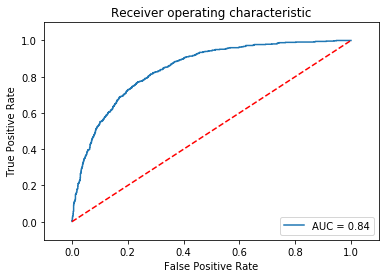

In [186]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

#scaling data before running model using StandardScaler 
sc_x = StandardScaler()
x_train= sc_x.fit_transform(x_train)
x_test= sc_x.transform(x_test)

#Logistic Regression
lr = LogisticRegression(fit_intercept=True, max_iter=1000, tol=2e-9, penalty='l2', C=100, random_state=0)

#Fit and Predict
lr.fit(X=x_train, y=y_train.values.ravel())
y_pred = lr.predict(x_test)

#Confusion Matrix 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=[0,1],
                      title='Confusion matrix, without normalization')
plt.show()

#accuracy score
print("Accuracy: ", accuracy_score(y_test, y_pred))

#ROC Curve
from sklearn.metrics import roc_curve, auc

# Get predicted scores Pr(y=1): Used as thresholds for calculating TP Rate and FP Rate
# lr.classes_
score = lr.predict_proba(x_test)[:, 1]

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, score) # fpr: FP Rate, tpr: TP Rate, thresholds: Pr(y=1)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.title('Receiver operating characteristic')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Accuracy:  0.8023696682464455
Confusion matrix, without normalization
[[1386  145]
 [ 272  307]]


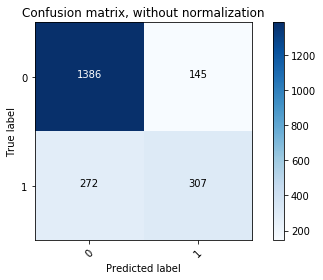

,Features,Support,Ranking
13,MonthlyCharges,True,1
25,FiberOptic,True,1
2,Dependents,True,1
3,tenure,True,1
24,DSL,True,1
5,MultipleLines,True,1
6,OnlineSecurity,True,1
23,Has_InternetService,True,1
22,Contract_Two year,True,1
20,Contract_Month-to-month,True,1


In [187]:
#RFE (i choose 14 after trying several numbers and 14 gave me the best accuracy score)
rfe = RFE(lr,14)
rfe = rfe.fit(x_train, y_train.values.ravel())

#Predict and Confusion Matrix 
y_pred = rfe.predict(x_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=[0,1],
                      title='Confusion matrix, without normalization')
plt.show()

#Feature Importance
output = {"Features" : cat, "Support": rfe.support_, "Ranking": rfe.ranking_}
output = pd.DataFrame(data = output)
output.sort_values(by = "Ranking")

## 3) Running Single Models: Decision Tree 

Confusion matrix, without normalization
[[1243  288]
 [ 292  287]]


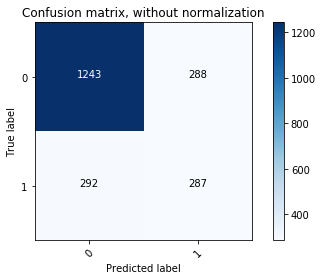

Accuracy:  0.7251184834123223


In [188]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

DT = DecisionTreeClassifier(criterion='entropy', random_state=12345)

# Fit decision tree model
DT = DT.fit(x_train, y_train)

# Validation
y_pred = DT.predict(x_test)

# Performance of Random Forest model
cm = confusion_matrix(y_test, y_pred)
plt.figure()
plot_confusion_matrix(cm, classes=[0,1],
                      title='Confusion matrix, without normalization')
plt.show()
print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.7412322274881517
Confusion matrix, without normalization
[[1252  279]
 [ 267  312]]


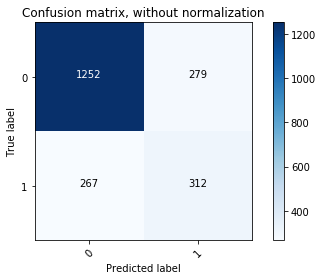

,Features,Support,Ranking
13,MonthlyCharges,True,1
1,Partner,True,1
25,FiberOptic,True,1
3,tenure,True,1
20,Contract_Month-to-month,True,1
18,PaymentMethod_Electronic check,True,1
7,OnlineBackup,True,1
14,Male,True,1
26,no_ofservice,True,1
12,PaperlessBilling,True,1


In [189]:
#RFE (i choose 10 after trying several numbers and 10 gave me the best accuracy score)
rfe = RFE(DT,10)
rfe = rfe.fit(x_train, y_train.values.ravel())

#Predict and Confusion Matrix 
y_pred = rfe.predict(x_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=[0,1],
                      title='Confusion matrix, without normalization')
plt.show()

#Feature Importance
output = {"Features" : cat, "Support": rfe.support_, "Ranking": rfe.ranking_}
output = pd.DataFrame(data = output)
output.sort_values(by = "Ranking")

## 4) Running Ensemble Methods: Bagging 

Accuracy:  0.7791469194312797
Confusion matrix, without normalization
[[1362  169]
 [ 297  282]]


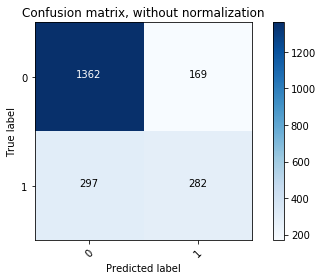

In [190]:
from sklearn.ensemble import BaggingClassifier

#Bagging
BA = BaggingClassifier(n_estimators=100, random_state=12345)
BA_model = BA.fit(x_train, y_train.values.ravel())


#Predict and Confusion Matrix
y_pred= BA.predict(x_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=[0,1],
                      title='Confusion matrix, without normalization')
plt.show()


## 4) Running Ensemble Methods: Random Forest 

Accuracy:  0.7848341232227488
Confusion matrix, without normalization
[[1382  149]
 [ 305  274]]


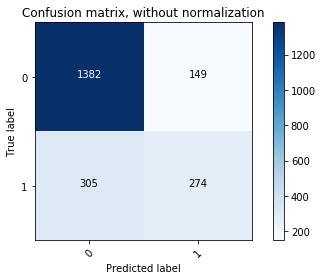

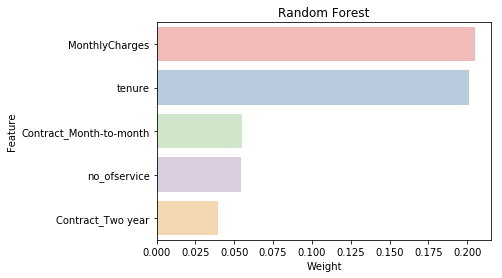

In [191]:
from sklearn.ensemble import RandomForestClassifier

#Random Forest 
RF = RandomForestClassifier(criterion='entropy', n_estimators=100, random_state=12345)
RF= RF.fit(x_train, y_train.values.ravel())

#Predict and Confusion Matrix
y_pred= RF.predict(x_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=[0,1],
                      title='Confusion matrix, without normalization')
plt.show()

#feature importance
Rfclf_fea = pd.DataFrame(RF.feature_importances_)
Rfclf_fea["Feature"] = list(cat) 
Rfclf_fea.sort_values(by=0, ascending=False).head()
g = sns.barplot(0,"Feature",data = Rfclf_fea.sort_values(by=0, ascending=False)[0:5], palette="Pastel1",orient = "h")
g.set_xlabel("Weight")
g = g.set_title("Random Forest")

## 5) Running Ensemble Learning Methods: AdaBoost  

Accuracy:  0.8023696682464455
Confusion matrix, without normalization
[[1387  144]
 [ 273  306]]


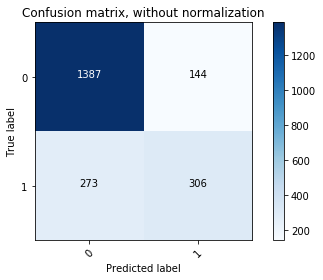

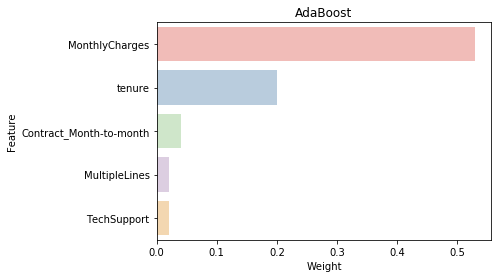

In [192]:
from sklearn.ensemble import AdaBoostClassifier

#Random Forest 
Ada = AdaBoostClassifier(n_estimators=100, random_state=12345)
Ada = Ada.fit(x_train, y_train.values.ravel())

#Predict and Confusion Matrix
y_pred= Ada.predict(x_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=[0,1],
                      title='Confusion matrix, without normalization')
plt.show()

#feature importance
Adaclf_fea = pd.DataFrame(Ada.feature_importances_)
Adaclf_fea["Feature"] = list(cat) 
Adaclf_fea.sort_values(by=0, ascending=False).head()
g = sns.barplot(0,"Feature",data = Adaclf_fea.sort_values(by=0, ascending=False)[0:5], palette="Pastel1",orient = "h")
g.set_xlabel("Weight")
g = g.set_title("AdaBoost")

## 7) Comparison of Models and select the best (Kfold)

In [193]:
from sklearn.model_selection import KFold, cross_val_score

kf = KFold(n_splits = 5, random_state = 12345, shuffle = True) #when setting seed, shuffle should be equals to True 

#Logistic Regression
lr_model= cross_val_score(lr, 
                             data[cat], # Feature matrix
                             data[target_col].values.ravel(), # Output vector
                             cv=kf, # Cross-validation technique
                             scoring='accuracy' # Model performance metrics: accuracy
                            )
# Decision Tree
dt_model= cross_val_score(DT, 
                             data[cat], # Feature matrix
                             data[target_col].values.ravel(), # Output vector
                             cv=kf, # Cross-validation technique
                             scoring='accuracy' # Model performance metrics: accuracy
                            )

# Bagging
bagging_model= cross_val_score(BA, 
                             data[cat], # Feature matrix
                             data[target_col].values.ravel(), # Output vector
                             cv=kf, # Cross-validation technique
                             scoring='accuracy' # Model performance metrics: accuracy
                            )

# Random Forest
rf_model= cross_val_score(RF, 
                             data[cat], # Feature matrix
                             data[target_col].values.ravel(), # Output vector
                             cv=kf, # Cross-validation technique
                             scoring='accuracy' # Model performance metrics: accuracy
                            )
# AdaBoost
ada_model= cross_val_score(Ada, 
                             data[cat], # Feature matrix
                             data[target_col].values.ravel(), # Output vector
                             cv=kf, # Cross-validation technique
                             scoring='accuracy' # Model performance metrics: accuracy
                            )

print("Logistic Regression: ", lr_model)
print("Average LR:", sum(lr_model)/len(lr_model))
print("Decision Tree: ", dt_model)
print("Average DT:", sum(dt_model)/len(dt_model))
print("Bagging: ", bagging_model)
print("Average Bagging:" ,sum(bagging_model)/len(bagging_model))
print("Random Forest: ", rf_model)
print("Average RF:", sum(rf_model)/len(rf_model))
print("AdaBoost: ",ada_model)
print("Average Adaboost:" ,sum(ada_model)/len(ada_model))

Logistic Regression:  [0.80668088 0.79957356 0.78733997 0.80156472 0.81294452]
Average LR: 0.8016207319428057
Decision Tree:  [0.74484719 0.72921109 0.72475107 0.72119488 0.75889047]
Average DT: 0.7357789390782321
Bagging:  [0.79957356 0.7803838  0.76955903 0.78093883 0.78520626]
Average Bagging: 0.7831322962509137
Random Forest:  [0.79104478 0.78678038 0.78165007 0.79587482 0.79018492]
Average RF: 0.7891069949985896
AdaBoost:  [0.7981521  0.80099502 0.78449502 0.79089616 0.82645804]
Average Adaboost: 0.8001992678347746


# Conclusion 

In conclusion, my logistic model seems to do the best among the rest of the models. Even with ensemble learning methods, it seems as though it can't beat the accuracy of my logistic regression model. This may be due to the fact that the ensemble learning methods uses decision trees as their base models, which was already doing worse than the logisitc regression model in the first place. Thus, one area of improvement may be finding a suitable logistic regression ensemble learning method to improve my model.

It seems like the company has a lot of issues regarding its internet and its various services. Through my analysis, I found that high prices of Internet Service and thus the lack of additional service results in poor delivery of the Internet Network from the teleco company to the customers. Thus, in order to improve on their services to reduce customer churn, the company can focuse more on their Internet Service rather than their Phone Service. For example, it can work on making Interent Service cheaper, creating bundles that sells not only its Internet Service but also other service like Online Backup or Online Security with it. This will make the service more worth it for customers and they will be less likely to churn.

# Appendix 

RFE: https://medium.com/@aneesha/recursive-feature-elimination-with-scikit-learn-3a2cbdf23fb7

Feature Engineering: https://medium.com/mindorks/what-is-feature-engineering-for-machine-learning-d8ba3158d97a
